<a href="https://colab.research.google.com/github/Mariappan07/Dirtydata/blob/main/Dirtydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
data = pd.read_csv("/content/123.csv")

In [89]:
data

,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
0,1.0,22.0,0.0,4.0,1.0,2.0,787475.0
1,NaN,20.0,0.0,5.0,NaN,1.0,513730.0
2,2.0,20.0,0.0,1.0,1.0,2.0,NaN
3,NaN,25.0,1.0,5.0,NaN,3.0,590768.0
4,2.0,22.0,1.0,1.0,0.0,3.0,913983.0
...,...,...,...,...,...,...,...
1254,2.0,24.0,0.0,1.0,0.0,2.0,564787.0
1255,1.0,20.0,0.0,1.0,1.0,3.0,693710.0
1256,1.0,24.0,0.0,4.0,1.0,1.0,898361.0
1257,1.0,21.0,1.0,5.0,0.0,3.0,610708.0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1224 non-null   float64
 1   Age               1229 non-null   float64
 2   Married           1241 non-null   float64
 3   Employment        1229 non-null   float64
 4   Two_Four_Wheeler  1210 non-null   float64
 5   Cinema_Likes      1213 non-null   float64
 6   Money             1217 non-null   float64
dtypes: float64(7)
memory usage: 69.0 KB


In [91]:
data.shape

(1259, 7)

In [92]:
data.columns

Index(['Gender', 'Age', 'Married', 'Employment', 'Two_Four_Wheeler',
       'Cinema_Likes', 'Money'],
      dtype='object')

In [93]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1254     True
1255     True
1256     True
1257     True
1258     True
Length: 1259, dtype: bool

In [94]:
data.describe()

,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
count,1224.000000,1229.000000,1241.000000,1229.000000,1210.000000,1213.000000,1.217000e+03
mean,1.476307,22.909683,0.483481,2.972335,0.500000,1.985985,1.209621e+06
std,0.499642,4.524182,0.499929,1.407593,0.500207,0.812831,1.335240e+07
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,7.500000e+01
25%,1.000000,21.000000,0.000000,2.000000,0.000000,1.000000,6.141570e+05
50%,1.000000,23.000000,0.000000,3.000000,0.500000,2.000000,7.374100e+05
75%,2.000000,24.000000,1.000000,4.000000,1.000000,3.000000,8.775150e+05
max,2.000000,85.000000,1.000000,5.000000,1.000000,3.000000,4.567893e+08


In [95]:
s=data.drop_duplicates()

In [96]:
s.shape

(1220, 7)

In [97]:
q1 = s.Age.quantile(.25)
q2 = s.Age.quantile(.50)
q3 = s.Age.quantile(.75)
print(q1)
print(q2)
print(q3)


21.0
23.0
24.0


In [98]:
#inter quantile range
iqr = q3-q1


In [99]:
iqr

3.0

In [100]:
lower_cutoff = q1-1.5*iqr
upper_cutoff = q3+1.5*iqr
print(lower_cutoff)
print(upper_cutoff)

16.5
28.5


In [101]:
p0 = s.Age.min()
p100 = s.Age.max()


In [102]:
#if p0 
print("p0 =", p0, 
      "p100 = ", p100,
      "lc = ", lower_cutoff ,
      "uc = ", upper_cutoff)

p0 = 1.0 p100 =  85.0 lc =  16.5 uc =  28.5


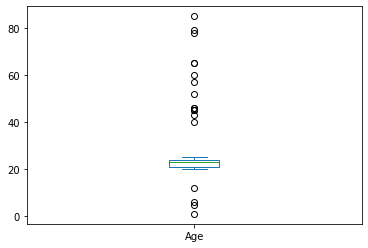

In [103]:
s.Age.plot(kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


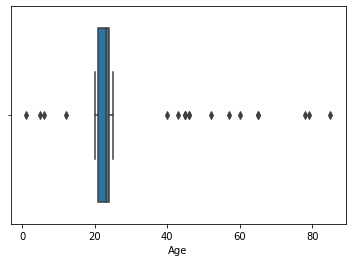

In [104]:
sns.boxplot(s['Age'])

In [105]:
s.shape

(1220, 7)

In [106]:
s.columns

Index(['Gender', 'Age', 'Married', 'Employment', 'Two_Four_Wheeler',
       'Cinema_Likes', 'Money'],
      dtype='object')

In [107]:
# handling missing values
s.isna().sum()

Gender              35
Age                 27
Married             18
Employment          30
Two_Four_Wheeler    49
Cinema_Likes        46
Money               42
dtype: int64

In [108]:
#arranging the missing values
s.isna().sum().sort_values(ascending=False)

Two_Four_Wheeler    49
Cinema_Likes        46
Money               42
Gender              35
Employment          30
Age                 27
Married             18
dtype: int64

In [109]:
#percentage of missing bvalues
s.isna().sum()/s.shape[0]

Gender              0.028689
Age                 0.022131
Married             0.014754
Employment          0.024590
Two_Four_Wheeler    0.040164
Cinema_Likes        0.037705
Money               0.034426
dtype: float64

In [110]:
#deleting null values
s.Age.mode()[0]
s.Age.fillna(s.Age.mode()[0],inplace=True)
s.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Gender              35
Age                  0
Married             18
Employment          30
Two_Four_Wheeler    49
Cinema_Likes        46
Money               42
dtype: int64

In [113]:
s.isna().sum()

Gender              35
Age                  0
Married             18
Employment          30
Two_Four_Wheeler    49
Cinema_Likes        46
Money               42
dtype: int64

In [114]:
s.shape

(1220, 7)

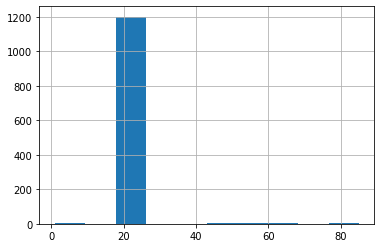

In [115]:
#univariate analysis
s.Age.hist()
plt.show()

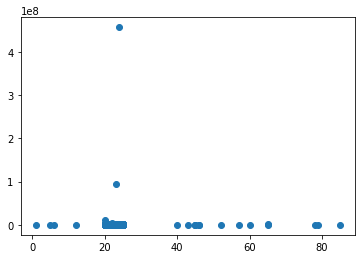

In [116]:
plt.scatter(s['Age'],s['Money'])

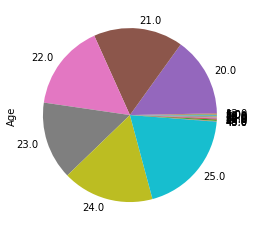

In [118]:
s.groupby('Age').Age.count().plot(kind='pie')

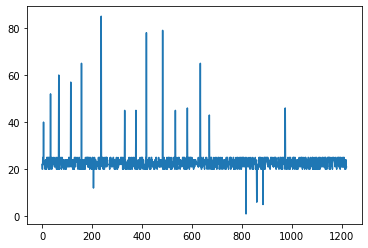

In [119]:
s.Age.plot()

In [137]:
s.select_dtypes(['float64','int64']).corr()

,Gender,Age,Married,Employment,Two_Four_Wheeler,Cinema_Likes,Money
Gender,1.000000,0.028411,-0.010951,0.009522,0.000359,-0.002902,-0.021223
Age,0.028411,1.000000,0.016842,0.036302,-0.020145,-0.073851,0.005797
Married,-0.010951,0.016842,1.000000,-0.084140,0.011302,-0.046065,-0.033682
Employment,0.009522,0.036302,-0.084140,1.000000,0.055227,0.010309,-0.018199
Two_Four_Wheeler,0.000359,-0.020145,0.011302,0.055227,1.000000,0.014167,-0.023711
Cinema_Likes,-0.002902,-0.073851,-0.046065,0.010309,0.014167,1.000000,-0.000580
Money,-0.021223,0.005797,-0.033682,-0.018199,-0.023711,-0.000580,1.000000


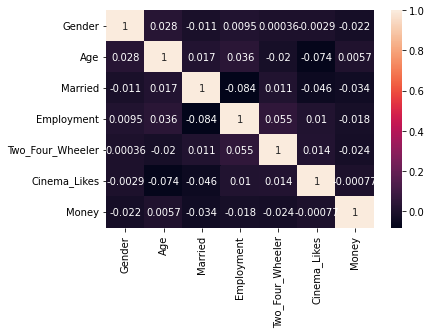

In [120]:
sns.heatmap(s.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()

In [121]:
q1 = s.Money.quantile(.25)
q2 = s.Money.quantile(.50)
q3 = s.Money.quantile(.75)
print(q1)
print(q2)
print(q3)


616782.75
737941.5
876455.0


In [122]:
#inter quantile range
iqr = q3-q1


In [125]:
p0 = s.Money.min()
p100 = s.Money.max()


In [124]:
#if p0 
print("p0 =", p0, 
      "p100 = ", p100,
      "lc = ", lower_cutoff ,
      "uc = ", upper_cutoff)

p0 = 1.0 p100 =  85.0 lc =  16.5 uc =  28.5


In [147]:
# clipping all the values grater than the upper cutoff 
s.Money.clip(upper = upper_cutoff)

0       28.5
1       28.5
2       28.5
3       28.5
4       28.5
        ... 
1215    28.5
1216    28.5
1217    28.5
1218    28.5
1219    28.5
Name: Money, Length: 1220, dtype: float64

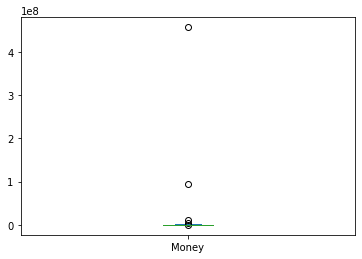

In [148]:
s.Money.plot(kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


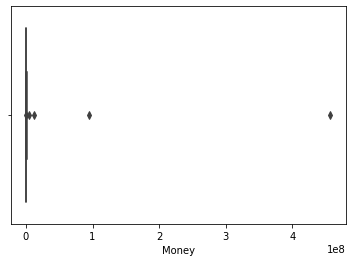

In [149]:
sns.boxplot(s['Money'])

In [128]:
s.shape

(1220, 7)

In [129]:
s.columns

Index(['Gender', 'Age', 'Married', 'Employment', 'Two_Four_Wheeler',
       'Cinema_Likes', 'Money'],
      dtype='object')

In [130]:
# handling missing values
s.isna().sum()

Gender              35
Age                  0
Married             18
Employment          30
Two_Four_Wheeler    49
Cinema_Likes        46
Money               42
dtype: int64

In [131]:
#percentage of missing bvalues
s.isna().sum()/s.shape[0]

Gender              0.028689
Age                 0.000000
Married             0.014754
Employment          0.024590
Two_Four_Wheeler    0.040164
Cinema_Likes        0.037705
Money               0.034426
dtype: float64

In [132]:
#deleting null values
s.Money.mode()[0]
s.Money.fillna(s.Money.mode()[0],inplace=True)
s.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Gender              35
Age                  0
Married             18
Employment          30
Two_Four_Wheeler    49
Cinema_Likes        46
Money                0
dtype: int64

In [133]:
s.isna().sum()

Gender              35
Age                  0
Married             18
Employment          30
Two_Four_Wheeler    49
Cinema_Likes        46
Money                0
dtype: int64

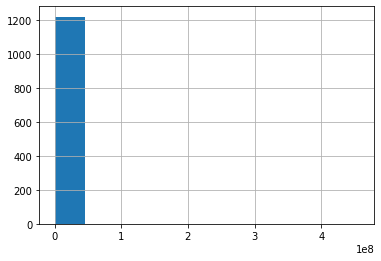

In [134]:
#univariate analysis
s.Money.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


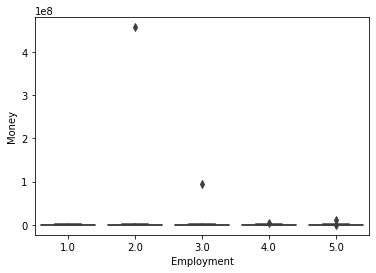

In [144]:
sns.boxplot(s['Employment'],s['Money'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


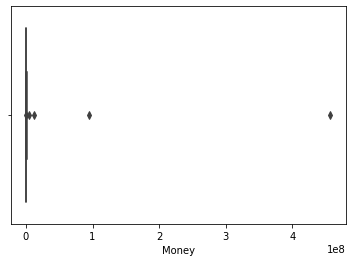

In [145]:
sns.boxplot(s['Money'])

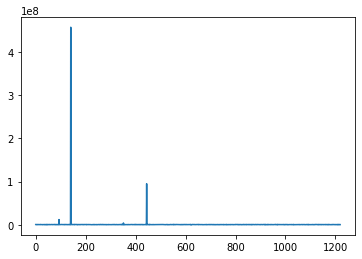

In [136]:
s.Money.plot()